<a href="https://colab.research.google.com/github/saikumarbysani/PortFolioProject/blob/main/SARIMAX_Market_Size_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats.stats import f_oneway,F_onewayResult
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
#from pmdarima.arima import auto_arima

# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# regression error metrics - scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import scipy.stats

# regression error metrics - scikit-learn
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.eval_measures import meanabs

# Some tests/statistics required for validating assumptions
from statsmodels.stats.diagnostic import normal_ad
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
df_deep=pd.read_excel("/content/drive/MyDrive/Lego/final_data_quantity_total.xlsx")

In [ ]:
df_deep.head()

,Unnamed: 0,Date,Market Volume,Personal_Saving,Saving_Rate,Disposable_Income,Toy_CPI,Personal_Expenditure,PPI,Inflation Rates,...,Unemp_state_Washington,Unemp_state_West Virginia,Unemp_state_Wisconsin,Unemp_state_Wyoming,Unemp_state_Puerto Rico,positive,negative,neutral,sales_qty,sales_nip
0,0.0,2017-01-01,1181.0,1000.5,6.9,13747.2,38.903,13020.4,91.7,2.5,...,4.8,5.4,3.5,4.8,11.8,1169.0,428.0,1404.0,3245862.0,42421716.96
1,1.0,2017-02-01,1180.0,1043.5,7.2,13783.4,38.728,13038.6,89.7,2.7,...,4.7,5.2,3.4,4.6,11.5,1224.0,354.0,1423.0,4191633.0,51423021.12
2,2.0,2017-03-01,1354.0,1047.1,7.2,13840.4,38.416,13089.3,90.7,2.4,...,4.6,5.1,3.3,4.4,11.2,1027.0,457.0,1517.0,4908765.0,62545641.48
3,3.0,2017-04-01,1277.0,1071.8,7.3,13864.5,38.057,13114.1,92.9,2.2,...,4.6,5.0,3.3,4.2,10.9,1014.0,420.0,1567.0,4212361.0,52991029.95
4,4.0,2017-05-01,1246.0,1157.0,7.8,13957.3,37.812,13117.6,92.9,1.9,...,4.6,5.0,3.2,4.1,10.6,1076.0,432.0,1493.0,3180010.0,44400646.34


In [ ]:
df_deep=df_deep.drop(['Unnamed: 0'],axis=1)

In [ ]:
df_new=df_deep[['Date','Market Volume']]

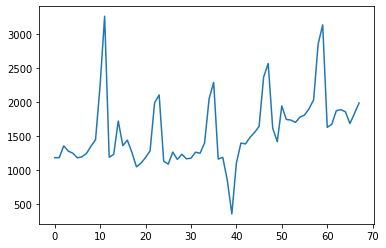

In [ ]:
df_new['Market Volume'].plot()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima import auto_arima

In [ ]:
auto_arima(df_new['Market Volume'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                   68
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -474.298
Date:                              Wed, 16 Nov 2022   AIC                            960.595
Time:                                      16:33:48   BIC                            973.824
Sample:                                           0   HQIC                           965.830
                                               - 68                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0673      0.655     -0.103      0.918      -1.351       1.216
ar.L1         -0.2811      0.102     -2.761      0.006      -0.481      -0.082
ar.L2         -0.3500      0.132     -2.651      0.008      -0.609      -0.091
ar.S.L12       0.9945      0.030     33.687      0.000       0.937       1.052
ma.S.L12      -0.8215      0.446     -1.843      0.065      -1.695       0.052
sigma2      5.311e+04   2.16e+04      2.459      0.014    1.08e+04    9.54e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                41.35
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.35   Skew:                            -0.61
Prob(H) (two-sided):                  0.02   Kurtosis:                         6.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train=df_new['Market Volume'].iloc[:58]
test=df_new['Market Volume'].iloc[58:]

In [ ]:
model=SARIMAX(train,order=(2,1,0),seasonal_order=(1,0,1,12))

In [ ]:
results=model.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        Market Volume   No. Observations:                   58
Model:             SARIMAX(2, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -407.771
Date:                              Wed, 16 Nov 2022   AIC                            825.543
Time:                                      16:33:49   BIC                            835.758
Sample:                                           0   HQIC                           829.513
                                               - 58                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2680      0.092     -2.910      0.004      -0.449      -0.087
ar.L2         -0.3440      0.130     -2.644      0.008      -0.599      -0.089
ar.S.L12       0.9994      0.004    245.707      0.000       0.991       1.007
ma.S.L12      -0.9402      0.194     -4.844      0.000      -1.321      -0.560
sigma2      5.319e+04   3.77e-06   1.41e+10      0.000    5.32e+04    5.32e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                42.93
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                            -0.74
Prob(H) (two-sided):                  0.25   Kurtosis:                         6.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.77e+24. Standard errors may be unstable.
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1

In [ ]:
predictions=results.predict(start,end,typ='levels')

In [ ]:
train_predictions=results.predict(0,start,typ='levels')

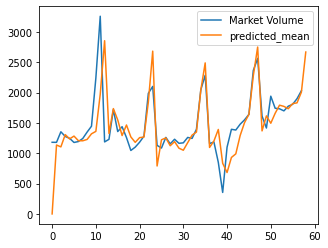

In [ ]:
train.plot(legend=True,figsize=(5,4))
train_predictions.plot(legend=True)

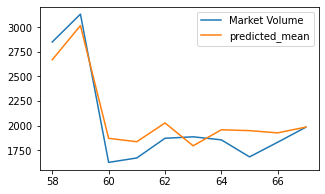

In [ ]:
test.plot(legend=True,figsize=(5,3))
predictions.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
rmse_split=rmse(test,predictions)
print(rmse_split)

160.17268631615755


### Forecasting the Market Volume

In [ ]:
model=SARIMAX(df_new['Market Volume'],order=(2,1,0),seasonal_order=(1,0,1,12))

In [ ]:
results=model.fit()

In [ ]:
fcast=results.predict(68,83,typ='levels')

In [ ]:
train_pred=results.predict(0,68,typ='levels')

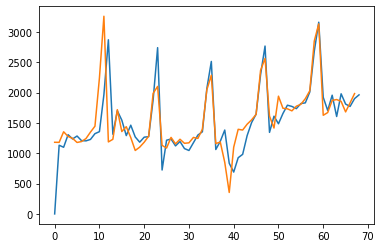

In [ ]:
train_pred.plot()
df_new['Market Volume'].plot()

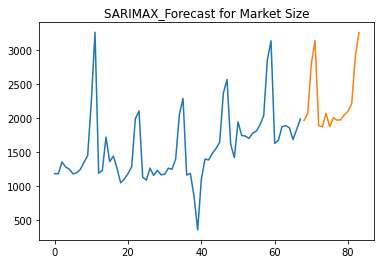

In [ ]:
df_new['Market Volume'].plot(figsize=(6,4))
fcast.plot(title='SARIMAX_Forecast for Market Size')

In [ ]:
fcast_1=pd.DataFrame(fcast)

In [ ]:
fcast_1.columns=['Market Volume']

In [ ]:
fcast_1.head()

,Market Volume
68,1962.883149
69,2065.565449
70,2796.339819
71,3135.568697
72,1884.883205


In [ ]:
df=pd.date_range(start="2022-09-01",end="2024-01-01",freq='M')

In [ ]:
fcast_1['Date']=df

In [ ]:
fcast_1=fcast_1[['Date','Market Volume']]

In [ ]:
fcast_1.head()

,Date,Market Volume
68,2022-09-30,1962.883149
69,2022-10-31,2065.565449
70,2022-11-30,2796.339819
71,2022-12-31,3135.568697
72,2023-01-31,1884.883205


In [ ]:
df_updated=pd.concat([df_new, fcast_1])

In [ ]:
df_updated['Date']=pd.to_datetime(df_updated['Date'])

In [ ]:
df_updated.head()

,Date,Market Volume
0,2017-01-01,1181.0
1,2017-02-01,1180.0
2,2017-03-01,1354.0
3,2017-04-01,1277.0
4,2017-05-01,1246.0


### extracting month from date

In [ ]:
df_updated['month']=df_updated['Date'].dt.month

### creating a new data for training the model

In [ ]:
df_updated_1=df_updated.iloc[0:68,]

In [ ]:
df_updated_1['sales_qty']=df_deep['sales_qty']

In [ ]:
df_updated['sales_qty']=df_deep['sales_qty']

In [ ]:
auto_arima(df_updated_1['sales_qty'],exogenous=df_updated_1[['Market Volume','month']],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:                          y   No. Observations:                   68
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood                -857.421
Date:                    Wed, 16 Nov 2022   AIC                           1720.841
Time:                            16:34:05   BIC                           1726.917
Sample:                                 0   HQIC                          1723.197
                                     - 68                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.405e+05   1.42e+05      0.989      0.323   -1.38e+05    4.19e+05
ma.S.L12      -0.1037      0.052     -2.013      0.044      -0.205      -0.003
sigma2      1.256e+12      0.096   1.31e+13      0.000    1.26e+12    1.26e+12
===================================================================================
Ljung-Box (L1) (Q):                   1.88   Jarque-Bera (JB):               143.27
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               2.72   Skew:                             1.35
Prob(H) (two-sided):                  0.03   Kurtosis:                        10.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.16e+28. Standard errors may be unstable.
"""

### Training the whole data to forecast the sales_qty from the forecasted values of market volume

In [ ]:
model_2=SARIMAX(df_updated['sales_qty'],exogenous=df_updated[['Market Volume','month']],order=(0,1,1),seasonal_order=(0,1,1,12))

In [ ]:
results_2=model_2.fit()

### forecasting the sales_qty till december 2023

In [ ]:
fcast_2=results_2.predict(68,83,exog=df_updated[68:][['Market Volume','month']])

In [ ]:
train_pred_2=results_2.predict(0,68,exog=df_updated[68:][['Market Volume','month']])

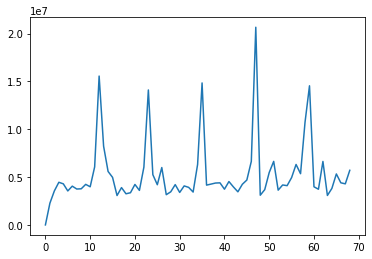

In [ ]:
train_pred_2.plot()

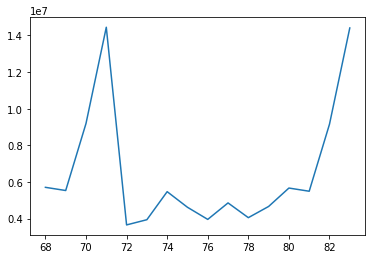

In [ ]:
fcast_2.plot()

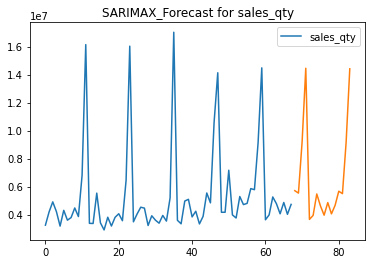

In [ ]:
df_updated['sales_qty'].plot(legend=True,figsize=(6,4))
fcast_2.plot(title='SARIMAX_Forecast for sales_qty')

### Calculating the error for september 2022 .
Actual is 5373793, given in the LEGO Group data.
Forecasted value is 5709710

In [ ]:
fcast_2.iloc[0]

5709710.845376773

In [ ]:
(5373793-fcast_2.iloc[0])/5373793

-0.06251038054066704